<h1 style='color:purple;'>TITLE: SURVIVING TITANIC - RDEWOLF - 11.28.16</h1>
<h3>EXECUTIVE SUMMARY</h3>
<p>The central question being addressed in this report is whether age, class and gender had an impact on survivorship probability for passengers aboard Titanic.<p>
<h3>INTRODUCTION</h3>
<p>For this analysis we will be using titanic passenger records downloaded from the Udacity site.  Kaggle has some description information for the values in this dataset which are included below. The purpose of this analysis will be to determine what independent variables from the set may be more or less useful to include in a predictive model where the dependent variable is survival.  I have also included directly below the Kaggle titanic file information a dictionary of all variables assigned within the analysis.

<h2>DATAFILE DESCRIPTION FROM KAGGLE</h2>

VARIABLE DESCRIPTIONS:
<ul>
<li>survival:        Survival   (0 = No; 1 = Yes)</li>
<li>pclass:          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) </li>
<li>name:            Name</li>
<li>sex:             Sex</li>
<li>age:             Age</li>
<li>sibsp:           Number of Siblings/Spouses Aboard</li>
<li>parch:           Number of Parents/Children Aboard</li>
<li>ticket:          Ticket Number</li>
<li>fare:            Passenger Fare</li>
<li>cabin:           Cabin</li>
<li>embarked:        Port of Embarkation  (C = Cherbourg; Q = Queenstown; S = Southampton)</li>
</ul>

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

<h2> ASSIGNED VARIABLES </h2>
<ul>
<li>Passengers - total number of unique passengers on board</li>
<li>Women - total number of female passengers on board</li>
<li>Men - total number of male passengers on board</li>
<li>TotSurvivor - total number of survivors</li>
<li>Survival_Rate_Women - proportion of women who survived vs. all survivors</li>
<li>Survival_Rate_Men - proportion of men who survived vs. all survivors</li>
<li>Unavailable - total number of passengers with age unavailable</li>
<li>SurvivorWomen_AgeAvail = total number of female survivors in the age available subset</li>
<li>SurvivorMen_AgeAvail = total number of male survivors in the age available subset</li>
<li>Tot_Child - Total number of child passengers in the age available subset</li>
<li>Tot_Senior - Total number of passengers 65+ in the age available subset</li>
<li>Chld_Surv - Total number of child survivors in the age available subset</li>
<li>Snr_Surv - Total number of survivors 65+ in the age available subset</li>
<li>Chld_Rate - Child survival rate for the age available subset</li>
<li>Snr_Rate - Senior survival rate for the age available subset</li>
</ul>

<ul><span style = 'font-weight:bold;'>DataFrames</span>
<li>GENDER - DataFrame containing total number of survivors by gender </li>
<li>AGE_AVAILABLE - DataFrame consisting only of passenger records where age is > 0</li>
<li>SURVIVORS - DataFrame containing only survivor records</li>
<li>SURVIVOR_AGE_AVAIL - Dataframe consisting of survivor records for the age available subset</li>
<li>SURVIVORWOMEN_AGEAVAIL - Dataframe consisting of female survivors in the age available subset</li>
<li>SURVIVORMEN_AGEAVAIL - Dataframe consisting of male survivors in the age available subset</li>
<li>PASSENGER_CHILD - Dataframe consisting of all child passengers in the age available subset</li>
<li>PASSENGER_SENIOR - Dataframe consisting of all passengers age 65+ in the age available subset</li>
<li>SURVIVOR_CHILD - Dataframe consisting of all child survivors in the age available subset</li>
<li>SURVIVOR_SENIOR - Dataframe consisting of all survivors 65+ in the age available subset</li>
</ul>

<ul><span style = 'font-weight:bold;'>Series</span>
<li>survivors_by_gender - pandas series of total number of survivors by gender</li>
<li>survivors_and_deceased - pandas series of total number of survivors and deceased</li>
<li>passenger_survivor_counts - pandas series containing passenger and survivor counts</li>
</ul>


<h3>METHODOLOGY</h3>
<p>For this analysis I will primarily use the pandas and matplotlib packages.  Since we will be using only the Age, Sex, Survived and Pclass fields for this analysis I will validate the PassengerID is unique and that each row is representative of a single passenger record before dropping all of the extra fields.</p>
<p>Within the dropped dataframe and for each of the independent variables we are examining we will review the column for null values and make a determination as to how to manage the nulls to continue the analysis.</p>
<p> Once our nulls have been resolved for we will look at each of the independent variables and examine the survival rate for that variable along several slices vs. survival rates overall to make comparisons and draw conclusions about negative or positive effects the variable appears to have on survivability.</p> 


In [58]:
#import packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.ticker as mtick

In [76]:
#upload titanic data & get basic info
titanic = pd.read_csv('../titanic_data.csv')
print titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#validate that passenger ID is unique
len(titanic) == len(titanic['PassengerId'].unique())

True

In [12]:
#drop columns unnecessary for analysis
def titanic_drop(column):
    titanic.drop(column, axis=1, inplace=True)
    
titanic_drop('SibSp')
titanic_drop('Parch')
titanic_drop('Ticket')
titanic_drop('Fare')
titanic_drop('Cabin')
titanic_drop('Embarked')
titanic_drop('Name')

In [13]:
#view cleaned titanic
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [14]:
#Calculate total number of passengers
Passengers = len(titanic)
Passengers

891

<h1 style='font-weight:200;color:blue;'>QUESTION #1:  Did gender impact survival rate?</h1>

In [15]:
#parse total passengers by gender
def passengers_by_gender(gender):
    gender_passenger = titanic[titanic['Sex'] == gender]
    count_gender_passenger = len(gender_passenger)
    return count_gender_passenger
    
Women = passengers_by_gender('female')
Men = passengers_by_gender('male')

print Women
print Men

314
577


In [16]:
#calculate distribution of passengers on board by gender
print float(Women) / float(Passengers)
print float(Men) / float(Passengers)

0.35241301908
0.64758698092


<h2 style='color:purple;'>35.2% of passengers on board were female and 64.8% were male</h2>

In [17]:
#Calculate total number of survivors
SURVIVORS = titanic[titanic['Survived'] == 1]
TotSurvivor = len(SURVIVORS)
print TotSurvivor

342


In [18]:
#validate that only surivors are included in the calculation
print SURVIVORS.Survived.min()

1


In [19]:
#Calclate overall survival rate
float(TotSurvivor) / float(Passengers)

0.3838383838383838

<h2 style='color: purple;'> Approximately 38.4% (or 342) of the passengers aboard Titanic survived. </h2> 

In [20]:
#pass the proportion of survivors and deceased to a series to plot
survivors_and_deceased = pd.Series([TotSurvivor, float(Passengers)-TotSurvivor], index=['Survivors', 'Deceased'])

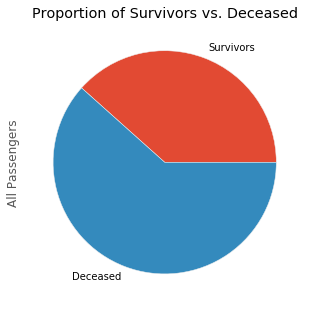

In [63]:
#plot the proportion of survivors
survivors_and_deceased.plot.pie(figsize=(5,5), title = 'Proportion of Survivors vs. Deceased', label = 'All Passengers')

In [22]:
#Group survivors by gender
survivors_by_gender = SURVIVORS.groupby('Sex').size()
survivors_by_gender

Sex
female    233
male      109
dtype: int64

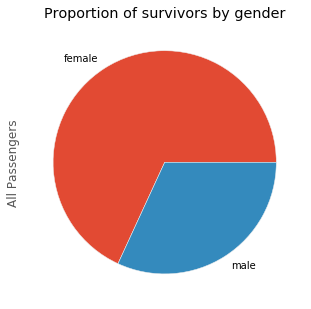

In [64]:
#plot gender distribution of survivors
survivors_by_gender.plot.pie(figsize=(5,5), title='Proportion of survivors by gender', label = 'All Passengers')

In [24]:
#Set gender as DataFrame
GENDER = pd.DataFrame(survivors_by_gender)

In [25]:
#Calculate proportion of survivors that were women
Survival_Rate_Women = GENDER.ix[0] / GENDER.sum()
Survival_Rate_Women

0    0.681287
dtype: float64

<h2 style='color:purple;'> Approximately 68.1% (or 233) of the survivors were female. </h2>
<p>Given that only 35.2% of the passengers on board were female they appear to have survived disproportionately.</p>

In [26]:
Survival_Rate_Men = GENDER.ix[1] / GENDER.sum()
Survival_Rate_Men

0    0.318713
dtype: float64

In [27]:
#Calculate rate of female survival
GENDER.ix[0]/Women

0    0.742038
Name: female, dtype: float64

In [28]:
#Calculate rate of male survival
GENDER.ix[1]/Men

0    0.188908
Name: male, dtype: float64

<h2 style='color:purple;'>74.2% of female passengers and 18.9% of male passengers survived. </h2>
<p>Further evidence that women survived diaproportionately</p>

In [29]:
#Add passenger and survival counts to a series to plot
passenger_survivor_counts = pd.Series([int(Men), int(GENDER.ix[1]), int(Women), int(GENDER.ix[0])], index=['Male Passengers', 'Male Survivors', 'Female Passengers', 'Female Survivors'])
passenger_survivor_counts

Male Passengers      577
Male Survivors       109
Female Passengers    314
Female Survivors     233
dtype: int64

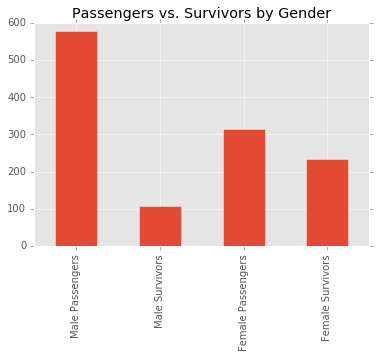

In [66]:
#plot the passenger and surival rates by gender
passenger_survivor_counts.plot.bar(title='Passengers vs. Survivors by Gender')

<h2 style='color:purple;'>Further evidence that women had a higher probability of survival.</h2>
<p> But gender alone cant be used to accurately predict (gender only model is only 78.6% accurate)</p>

<h1 style='font-weight:200;color:blue;'>QUESTION #2:  Did age impact survival rate?</h1>

In [31]:
#run stats for passenger age
titanic['Age'].describe()

C:\Users\ReneeD\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [32]:
#Because we got a warning, lets calculate the number of records with age unavailable
AGE_AVAILABLE = titanic[titanic['Age'] >0]
Unavailable = Passengers - len(AGE_AVAILABLE)
Unavailable

177

In [33]:
#calculate age unavailable rate
print float(len(AGE_AVAILABLE)) / float(Passengers)
print Passengers - Unavailable

0.801346801347
714


<h2 style='color:purple;'> 20% of passengers do not have any age information available in the data</h2>
<p>The next several age related analyses will focus on 714 person subset for whom an age is available</p>

<h2 style='color:purple;'> The average passenger age was 29.7 with a median of 28</h2>

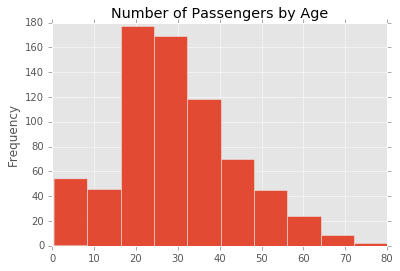

In [69]:
#plot the distribution of ages of passengers
AGE_AVAILABLE['Age'].plot.hist(title='Number of Passengers by Age')

<h2 style='color:purple;'> 75% of passengers on board were age 38 or younger</h2>

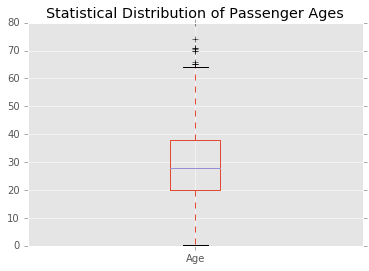

In [70]:
#plot the distibution of ages of passengers.
AGE_AVAILABLE['Age'].plot.box(title='Statistical Distribution of Passenger Ages')

In [36]:
#run stats on survivors where age was available
SURVIVOR_AGE_AVAIL= AGE_AVAILABLE[(AGE_AVAILABLE['Survived'] == 1)]
SURVIVOR_AGE_AVAIL['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

<h2 style='color:purple;'> The average survivor age was 28.3 with a median of 28</h2>
<p> This is not substantially different from the overall passenger demographic</p>

<h3> Does age relate to survival rate disproportionately for men or women?</h3>

In [37]:
#count survival by gender for age available subset
def surv_by_gender(gender):
   survivor_gender = AGE_AVAILABLE[(AGE_AVAILABLE['Survived'] == 1) & (AGE_AVAILABLE['Sex'] == gender)]
   return len(survivor_gender)

SurvivorWomen_AgeAvail = surv_by_gender('female')
SurvivorMen_AgeAvail = surv_by_gender('male')

print SurvivorWomen_AgeAvail
print SurvivorMen_AgeAvail

197
93


In [38]:
#create dataframe of survival by gender for age available subset to run stats
def surv_by_gender(gender):
   survivor_gender = AGE_AVAILABLE[(AGE_AVAILABLE['Survived'] == 1) & (AGE_AVAILABLE['Sex'] == gender)]
   return survivor_gender['Age'].describe()

SURVIVOR_WOMEN_AGE_AVAIL = surv_by_gender('female')
SURVIVOR_MEN_AGE_AVAIL = surv_by_gender('male')

print 'Surivivor Women For Age Available Subset'
print SURVIVOR_WOMEN_AGE_AVAIL
print
print 'Survivor Men For Age Available Subset'
print SURVIVOR_MEN_AGE_AVAIL

Surivivor Women For Age Available Subset
count    197.000000
mean      28.847716
std       14.175073
min        0.750000
25%       19.000000
50%       28.000000
75%       38.000000
max       63.000000
Name: Age, dtype: float64

Survivor Men For Age Available Subset
count    93.000000
mean     27.276022
std      16.504803
min       0.420000
25%      18.000000
50%      28.000000
75%      36.000000
max      80.000000
Name: Age, dtype: float64


<h2 style='color:purple;'> The men who survived were only slightly younger on average (27.3) than the women.</h2>
<p> The female survivor average ages line right up with the total survivor demographics (which follows as they make up the majority of survivors.)  Men were 27.3 and 36 for the mean and median respectively.</p>

<h2>Did children and the elderly have better or worse rates of survival?</h2>

In [39]:
#parse child and elderly passengers in age available subset
PASSENGER_CHILD= AGE_AVAILABLE[(AGE_AVAILABLE['Age'] <= 18 )]
PASSENGER_SENIOR= AGE_AVAILABLE[(AGE_AVAILABLE['Age'] >= 65 )]
Tot_Child = len(PASSENGER_CHILD)
Tot_Senior = len(PASSENGER_SENIOR)

In [40]:
#parse child and elederly survivors in age available subset
SURVIVOR_CHILD= AGE_AVAILABLE[(AGE_AVAILABLE['Survived'] == 1) & (AGE_AVAILABLE['Age'] <= 18 )]
SURVIVOR_SENIOR= AGE_AVAILABLE[(AGE_AVAILABLE['Survived'] == 1) & (AGE_AVAILABLE['Age'] >= 65 )]
Chld_Surv = len(SURVIVOR_CHILD)
Snr_Surv = len(SURVIVOR_SENIOR)

In [41]:
#calculate child survival rate in age available subset
Chld_Rate = float(Chld_Surv)/float(Tot_Child)
Chld_Rate

0.5035971223021583

<h2 style='color:purple;'> 50% of passengers aged 18 or younger did not survive.  </h2> <p>This makes the child survival rate disproportionately better than the overall survival rate of 38% for passengers in general. (It is interesting to note that the overall survival rate of women in general exceeds that of children)</p>

In [42]:
#calculate elderly surival rate in age available subset
Snr_Rate = float(Snr_Surv)/float(Tot_Senior)
Snr_Rate

0.09090909090909091

<h2 style='color:purple;'> 91% of passengers aged 65 or older did not survive.  </h2> <p>This makes the elderly survival rate disproportionately worse than the overall survival rate of 38% for passengers in general. (It is important to note that the there were a small number of passengers in this age group on board (11) and only 1 survived so this is a relatively small sample</p>

In [43]:
#calculate child survivor rates by gender
SURVIVOR_CHILD_FEMALE= AGE_AVAILABLE[(AGE_AVAILABLE['Survived'] == 1) & (AGE_AVAILABLE['Age'] <= 18 ) & (AGE_AVAILABLE['Sex'] <= 'female' )]
SURVIVOR_CHILD_MALE= AGE_AVAILABLE[(AGE_AVAILABLE['Survived'] == 1) & (AGE_AVAILABLE['Age'] <= 18 ) & (AGE_AVAILABLE['Sex'] <= 'male' )]
PASSENGER_CHILD_FEMALE= AGE_AVAILABLE[(AGE_AVAILABLE['Age'] <= 18 ) & (AGE_AVAILABLE['Sex'] <= 'female' )]
PASSENGER_CHILD_MALE= AGE_AVAILABLE[(AGE_AVAILABLE['Age'] <= 18 ) & (AGE_AVAILABLE['Sex'] <= 'male' )]
Tot_Child_Passenger = float(len(PASSENGER_CHILD_FEMALE)) + float(len(PASSENGER_CHILD_MALE))
Tot_Child_Survivor = float(len(SURVIVOR_CHILD_FEMALE)) + float(len(SURVIVOR_CHILD_MALE))

print float(len(SURVIVOR_CHILD_MALE)) / Tot_Child_Survivor
print float(len(SURVIVOR_CHILD_FEMALE)) / Tot_Child_Survivor
print float(len(PASSENGER_CHILD_MALE)) / Tot_Child_Passenger
print float(len(PASSENGER_CHILD_FEMALE)) / Tot_Child_Passenger


0.603448275862
0.396551724138
0.671497584541
0.328502415459


<h2 style='color:purple;'> Survival rates, when broken by gender, appear different for children than adults.  </h2> <p>Male children accounted for 67% of the child passengers on board and 60% of surviving children.  So gender did not negatively impact survival rate for males under the age of 18 to the same degree it imapacted males overall.</p>

<h1 style='font-weight:200;color:blue;'>QUESTION #3:  Did class impact survival rate?</h1>

In [44]:
#create a dataframe for each group of passengers by class
def pass_class_df(tclass):
    PASSENGER_CLASS = titanic[titanic['Pclass'] == tclass]
    return PASSENGER_CLASS

PASS_CLASS_1 = pass_class_df(1)
PASS_CLASS_2 = pass_class_df(2)
PASS_CLASS_3 = pass_class_df(3)

In [45]:
#count the passengers in each class and pass the counts to a series for plotting
def pass_class_count(class_df):
    Pass_Class_Total = len(class_df)
    return Pass_Class_Total

Pass_Class_1 = pass_class_count(PASS_CLASS_1) 
Pass_Class_2 = pass_class_count(PASS_CLASS_2)    
Pass_Class_3 = pass_class_count(PASS_CLASS_3)  

pass_class_series = pd.Series([Pass_Class_1, Pass_Class_2, Pass_Class_3], index = ['Class 1', 'Class 2', 'Class 3'])
pass_class_series

Class 1    216
Class 2    184
Class 3    491
dtype: int64

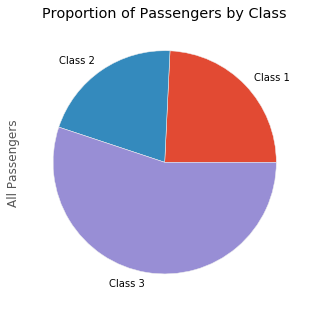

In [71]:
pass_class_series.plot.pie(figsize=(5,5), title='Proportion of Passengers by Class', label='All Passengers')

In [47]:
Class_1_Dist = float(Pass_Class_1) / sum(pass_class_series)
Class_2_Dist = float(Pass_Class_2) / sum(pass_class_series)
Class_3_Dist = float(Pass_Class_3) / sum(pass_class_series)

print Class_1_Dist
print Class_2_Dist
print Class_3_Dist

0.242424242424
0.206509539843
0.551066217733


<h2 style='color:purple;'>55.1% of the passengers on board were in 3rd class.</h2>

In [48]:
#create a dataframe for each group of passengers by class and survival
def surv_class_df(tclass):
    SURVIVOR_CLASS = titanic[(titanic['Pclass'] == tclass) & (titanic['Survived'] == 1)]
    return SURVIVOR_CLASS

SURV_CLASS_1 = surv_class_df(1)
SURV_CLASS_2 = surv_class_df(2)
SURV_CLASS_3 = surv_class_df(3)

In [49]:
#count the passengers in each class and pass the counts to a series for plotting
def surv_class_count(surv_df):
    Surv_Class_Total = len(surv_df)
    return Surv_Class_Total

Surv_Class_1 = surv_class_count(SURV_CLASS_1) 
Surv_Class_2 = surv_class_count(SURV_CLASS_2)    
Surv_Class_3 = surv_class_count(SURV_CLASS_3)  

surv_class_series = pd.Series([Surv_Class_1, Surv_Class_2, Surv_Class_3], index = ['Class 1', 'Class 2', 'Class 3'])
surv_class_series

Class 1    136
Class 2     87
Class 3    119
dtype: int64

In [50]:
#Calculate survival rate for each class as a proportion of total survivors
print surv_class_series[0] / float(sum(surv_class_series))
print surv_class_series[1] / float(sum(surv_class_series))
print surv_class_series[2] / float(sum(surv_class_series))

0.397660818713
0.254385964912
0.347953216374


<h3 style = 'color:purple;'><ul><li>Class 1 passengers made up 24.2% of passengers on board and 39.7% of survivors.</li>
<li>Class 2 passengers made up 20.7% of passengers on board and 25.4% of survivors.</li>
<li>Class 3 passengers made up 55.1% of passengers on board and 34.8% of survivors.</li></h2>

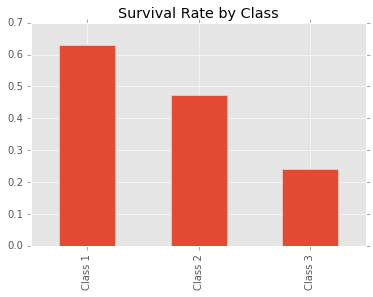

In [74]:
#Calculate survival rate for each class as a proportion of the class
deceased_class = surv_class_series / pass_class_series
deceased_class.plot.bar(title='Survival Rate by Class')

In [52]:
AGE_AVAILABLE['Survived'].describe()

count    714.000000
mean       0.406162
std        0.491460
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

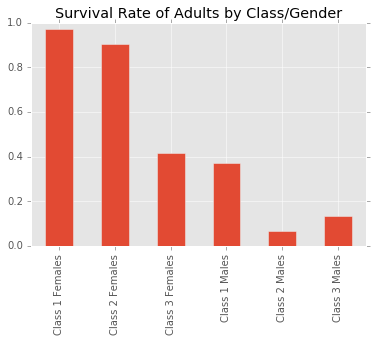

In [55]:
#Examine class, gender and age together for adults
def adult_class_gender(pclass, gender):
    adultxxsurv = len(SURVIVORS[(SURVIVORS['Sex']  == gender) & (SURVIVORS['Age'] >= 18 ) & (SURVIVORS['Pclass'] == pclass )])
    adultxxpass = len(AGE_AVAILABLE[(AGE_AVAILABLE['Sex'] == gender) & (AGE_AVAILABLE['Age'] >= 18)& (AGE_AVAILABLE['Pclass'] == pclass )])
    survival_rate = float(adultxxsurv) / float(adultxxpass)
    return survival_rate

class_1_females = adult_class_gender(1,'female')
class_2_females = adult_class_gender(2,'female')
class_3_females = adult_class_gender(3,'female')
class_1_males = adult_class_gender(1,'male')
class_2_males = adult_class_gender(2,'male')
class_3_males = adult_class_gender(3,'male')

adult_survivors_by_age_gender = pd.Series([class_1_females, class_2_females, class_3_females,class_1_males, class_2_males, class_3_males], index = ['Class 1 Females', 'Class 2 Females', 'Class 3 Females', 'Class 1 Males', 'Class 2 Males', 'Class 3 Males'])
adult_survivors_by_age_gender.plot.bar(title='Survival Rate of Adults by Class/Gender')

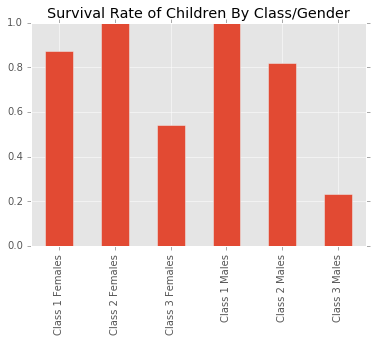

In [56]:
#Examine class, gender and age together for children
def child_class_gender(pclass, gender):
    childxxsurv = len(SURVIVORS[(SURVIVORS['Sex']  == gender) & (SURVIVORS['Age'] < 18 ) & (SURVIVORS['Pclass'] == pclass )])
    childxxpass = len(AGE_AVAILABLE[(AGE_AVAILABLE['Sex'] == gender) & (AGE_AVAILABLE['Age'] < 18)& (AGE_AVAILABLE['Pclass'] == pclass )])
    survival_rate = float(childxxsurv) / float(childxxpass)
    return survival_rate

class_1_females = child_class_gender(1,'female')
class_2_females = child_class_gender(2,'female')
class_3_females = child_class_gender(3,'female')
class_1_males = child_class_gender(1,'male')
class_2_males = child_class_gender(2,'male')
class_3_males = child_class_gender(3,'male')

child_survivors_by_age_gender = pd.Series([class_1_females, class_2_females, class_3_females,class_1_males, class_2_males, class_3_males], index = ['Class 1 Females', 'Class 2 Females', 'Class 3 Females', 'Class 1 Males', 'Class 2 Males', 'Class 3 Males'])
child_survivors_by_age_gender.plot.bar(title='Survival Rate of Children By Class/Gender')

<h3>CONCLUSION</h3>
<p>Before concluding it is imperative to discuss the limitations of the data analyzed throughout.  This particular titanic dataset includes the records for 891 passengers.  There are no conclusive agreeing records on the exact number of people on board titanic but several estimates are closer to 1300 passengers and 2200 including crew*.  So at best this dataset is a sample and we assume it to be representative in any statement of findings.  I chose to drop the records without age information for the age based portions of this analysis so again I assume that subset to be representative.  Any discrepancy in the quality of data collection (by class for example) could skew those findings.  The datafile additionally does not include any fields that indicate whether the persons are passengers or crew so we further assume them to be passengers. </p> 

<p>Limitations aside, Age, Sex and Passenger Class all do appear to have an influence on survivorship rates.  For example, adult women of every passenger class outsurvived men in each class. But 97% of adult women in passenger class 1 survived compared to a 74% survivor rate in suviving women vs. all female passengers so gender did not count for all of the variability.  In addition to class impacts on suvivorship we also see the effect when we take age into account.  Class 1 female children did not have the highest survival rate in alignment with class 1 women for example.  Gender was less relevant overall to rate of survival in children.</p>

<p>(Analyst note:  this makes sense when you consider adult women likely took with them their children of both genders</p>

<p>In closing, I would suggest that all three of these variables would be useful to examine versus survival in a logistic regression and that would be my next step in this analysis were I to continue.</p>

<p>*http://www.titanicfacts.net/titanic-passengers.html</p>